<a href="https://colab.research.google.com/github/corinaccqf/unsupervised-learning/blob/main/tarea_hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Produce dendrograms for the heart disease dataset. (https://domitilamedia.s3-ap-southeast-2.amazonaws.com/python/data/heartdisease.csv)


2. Use three different linkage methods: complete, average, and ward. Which linkage method do you think produces the most reasonable result?

3. Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above, and get ARI and silhouette scores for each of your solutions. Compare the results with each other. Then compare the results with the results from the k-means solution that you implemented previously. Which algorithm and setting perform better?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [3]:
df=pd.read_csv('https://domitilamedia.s3-ap-southeast-2.amazonaws.com/python/data/heartdisease.csv')

In [16]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    int64  
 1   1       303 non-null    int64  
 2   2       303 non-null    int64  
 3   3       303 non-null    int64  
 4   4       303 non-null    int64  
 5   5       303 non-null    int64  
 6   6       303 non-null    int64  
 7   7       303 non-null    int64  
 8   8       303 non-null    int64  
 9   9       303 non-null    float64
 10  10      303 non-null    int64  
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [18]:
df= df.replace('?', pd.NA)

In [19]:
df.dropna(inplace=True)

Después de cargar el conjunto de datos, estandarizamos nuestras características ya que la mayoría de los algoritmos de agrupamiento son sensibles a las escalas de las variables.


In [22]:
#Es una clase de Scikit-learn utilizada para estandarizar características eliminando la media y escalando a la varianza unitaria.
from sklearn.preprocessing import StandardScaler

In [24]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

In [27]:
print(X_std)

[[ 0.93618065  0.69109474 -2.24062879 ... -0.72197605  0.65587737
  -0.76766788]
 [ 1.3789285   0.69109474  0.87388018 ...  2.47842525 -0.89422007
   0.85508913]
 [ 1.3789285   0.69109474  0.87388018 ...  1.41162482  1.17257652
   0.04371063]
 ...
 [ 1.48961547  0.69109474  0.87388018 ...  1.41162482  1.17257652
   0.85508913]
 [ 0.27205887  0.69109474  0.87388018 ...  0.34482438  1.17257652
   1.66646763]
 [ 0.27205887 -1.44697961 -1.20245913 ...  0.34482438 -0.89422007
   0.04371063]]


In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

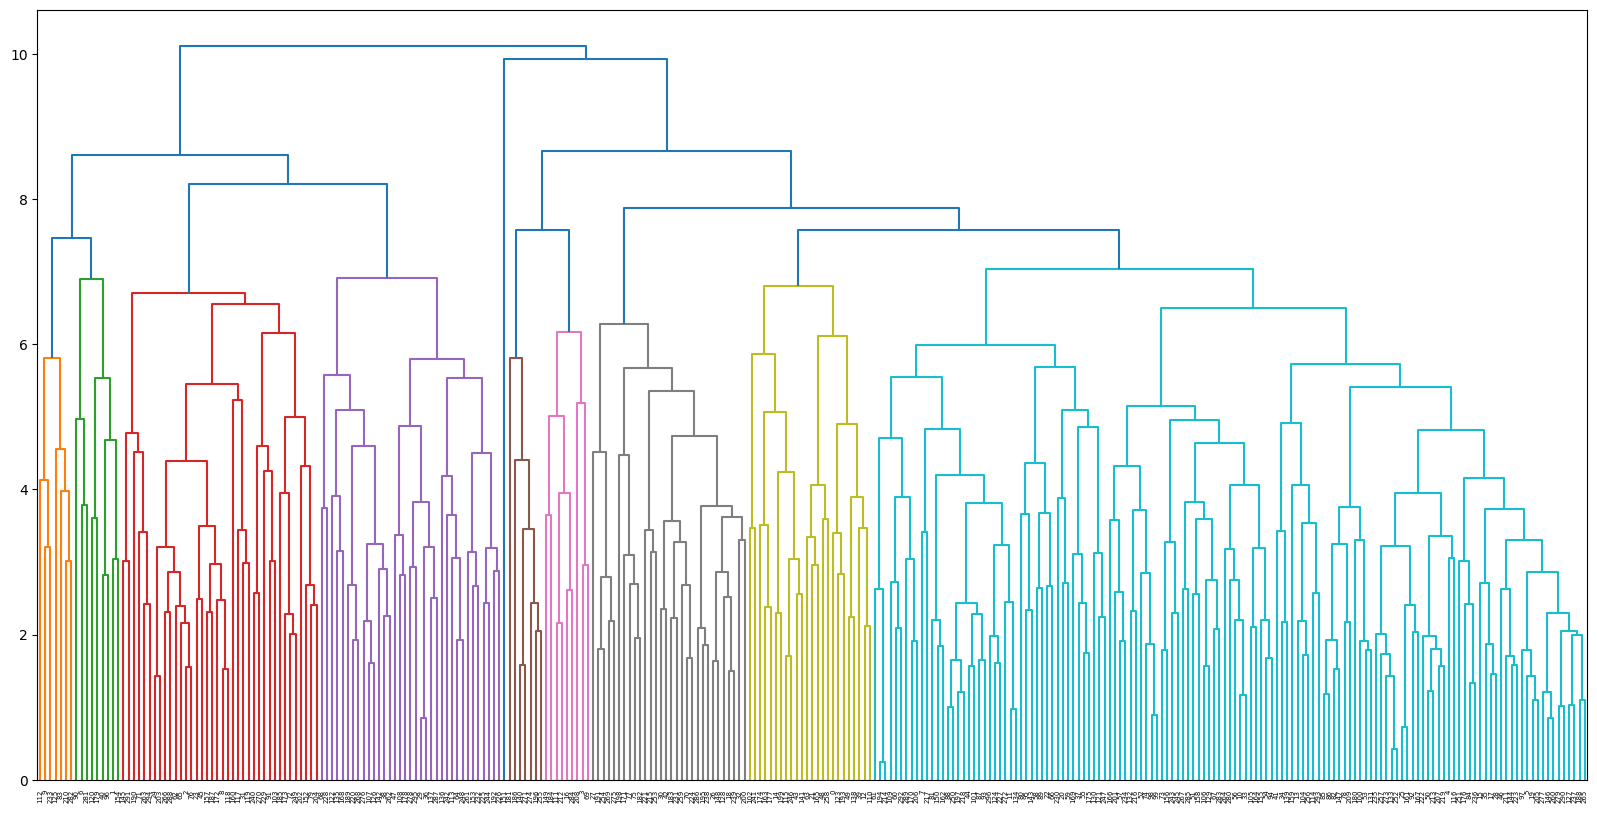

In [47]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

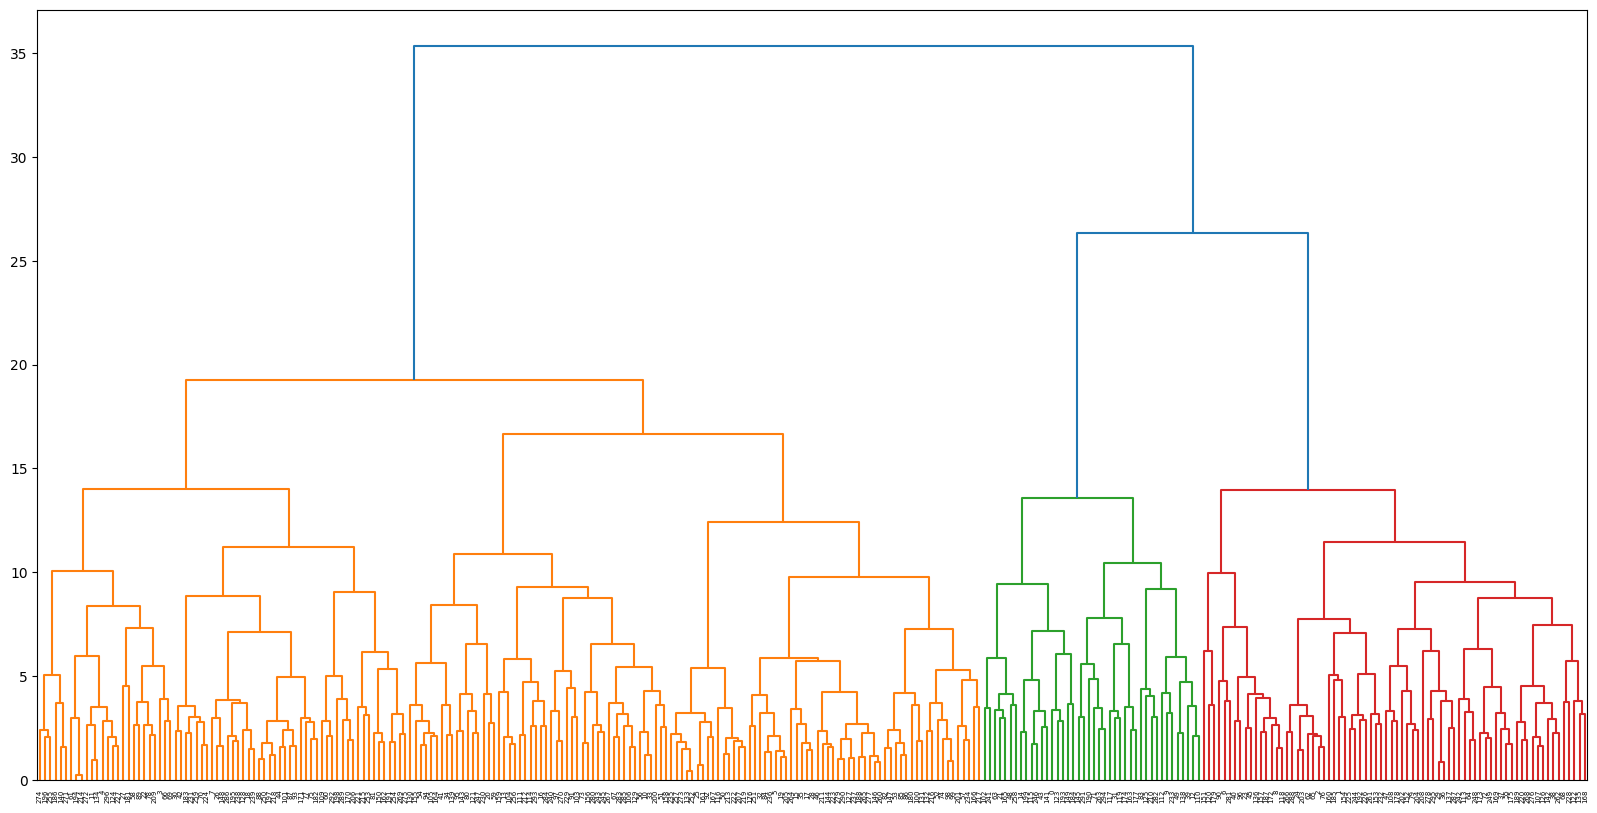

In [48]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

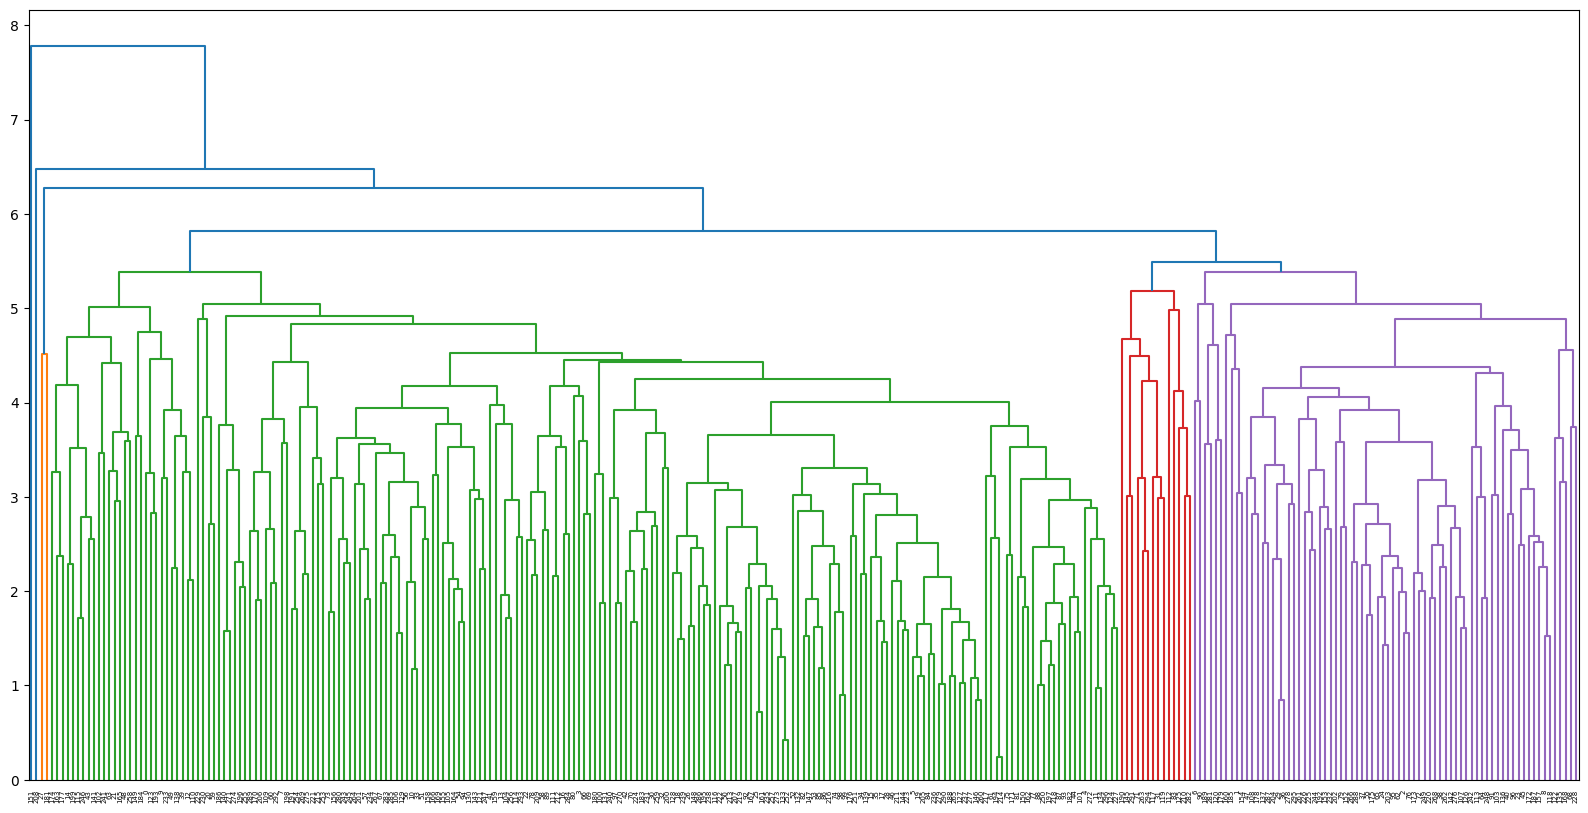

In [49]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

In [51]:
linkage_methods = ['complete', 'average', 'ward']

In [56]:
for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=2, linkage=method)
    clusters = clustering.fit_predict(X_std)

    # puntuaciones Silueta
    silhouette_avg = silhouette_score(X_std, clusters)
    print(f"Método {method}: Silhouette = {silhouette_avg:.2f}")

     # puntuaciones ARI
    ari_score = adjusted_rand_score(df['13'], clusters)

    print(f"Método {method}: ARI = {ari_score:.2f}")



Método complete: Silhouette = 0.19
Método complete: ARI = 0.46
Método average: Silhouette = 0.33
Método average: ARI = -0.00
Método ward: Silhouette = 0.17
Método ward: ARI = 0.28


observando los resultados, el método 'average' tiene la mejor puntuación de Silueta, pero un ARI muy bajo, mientras que el método 'complete' tiene el mejor ARI pero una puntuación de Silueta más baja. Esto podría sugerir que 'average' forma clusters bien separados pero no necesariamente alineados con las etiquetas verdaderas, mientras que 'complete' está más alineado con las etiquetas verdaderas pero con una separación menos clara.